In [58]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv(r'C:\Users\APOORVA\Desktop\MACHINE LEARNING\Recording\18\Social_Network_Ads.csv')

In [60]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [61]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
le=LabelEncoder()

In [65]:
df['Gender']=le.fit_transform(df['Gender'])

In [66]:
df['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [67]:
#df['Gender']=df['Gender'].astype('float')

In [68]:
df['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [69]:
X=df.drop(['User ID','Purchased'],axis=1)

In [70]:
y=df[['Purchased']]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
model=KNeighborsClassifier(n_neighbors=2)

In [75]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [76]:
y_pred=model.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [78]:
cm=confusion_matrix(y_test,y_pred)

In [79]:
ac=accuracy_score(y_test,y_pred)*100

In [80]:
cm

array([[50,  3],
       [15, 12]], dtype=int64)

In [81]:
ac

77.5

In [82]:
model.score(X_train,y_train)*100


89.375

In [83]:
model.score(X_test,y_test)*100

77.5

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

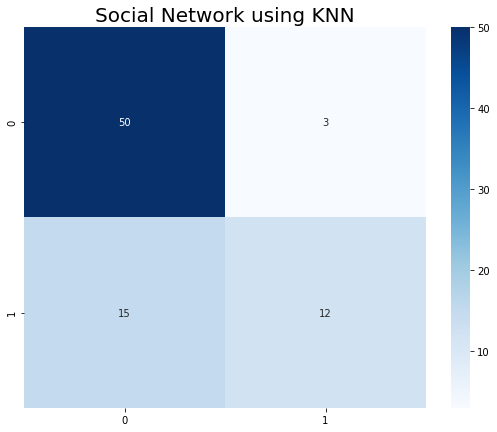

In [85]:
plt.figure(figsize=(9,7))
plt.title("Social Network using KNN", fontsize =20)
sns.heatmap(cm,cmap="Blues",annot=True)
plt.show()

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr=LogisticRegression()

In [96]:
lr.fit(X_train,y_train)

LogisticRegression()

In [108]:
y_lr=lr.predict(X_test)
y_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [109]:
accuracy_score(y_test,y_lr)*100

66.25

In [113]:
lr.score(X_test,y_test)*100

66.25

In [110]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        53
           1       0.00      0.00      0.00        27

    accuracy                           0.66        80
   macro avg       0.33      0.50      0.40        80
weighted avg       0.44      0.66      0.53        80



In [112]:
cf=confusion_matrix(y_test,y_lr)
cf

array([[53,  0],
       [27,  0]], dtype=int64)

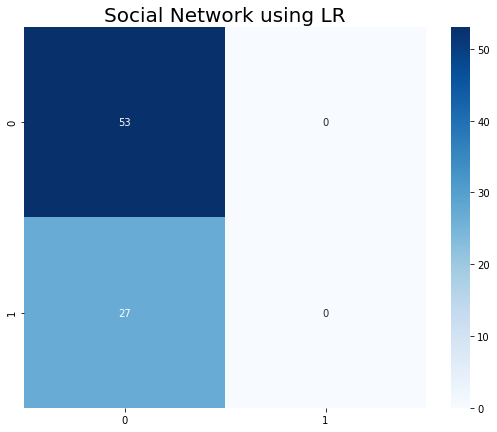

In [114]:
plt.figure(figsize=(9,7))
plt.title("Social Network using LR", fontsize =20)
sns.heatmap(cf,cmap="Blues",annot=True)
plt.show()